In [1]:
import numpy as np
import colorcet as cc
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# compute color similarity between 2 RGB colors
def colorDistance(rgb1,rgb2):
  '''d = {} distance between two colors(3)'''
  rm = 0.5*(rgb1[0]+rgb2[0])
  d = sum((2+rm,4,3-rm)*(rgb1-rgb2)**2)**0.5
  return d/3.0 # normalize by 3.0 which is the maximum color distance (white vs black)

In [4]:
num_landmarks = 10
palette = sns.color_palette(cc.glasbey, n_colors=num_landmarks)
#palette = [np.array(c) for c in palette]
palette

[(0.8392156862745098, 0.0, 0.0),
 (0.5490196078431373, 0.23137254901960785, 1.0),
 (0.00392156862745098, 0.5294117647058824, 0.0),
 (0.0, 0.6745098039215687, 0.7764705882352941),
 (0.592156862745098, 1.0, 0.0),
 (1.0, 0.49411764705882355, 0.8196078431372549),
 (0.4196078431372549, 0.0, 0.30980392156862746),
 (1.0, 0.6470588235294118, 0.1843137254901961),
 (0.3411764705882353, 0.23137254901960785, 0.0),
 (0.0, 0.33725490196078434, 0.34901960784313724)]

In [17]:
sims = -1 * np.ones((num_landmarks, num_landmarks))
for i, ci in enumerate(palette):
  for j, cj in enumerate(palette):
    # skip if distance computed already
    if sims[i][j] != -1: continue
    # color distance
    d = colorDistance(np.array(ci), np.array(cj))
    sims[i][j] = d
    sims[j][i] = d # symmetric property


Text(0.5, 1.0, 'Color similarity')

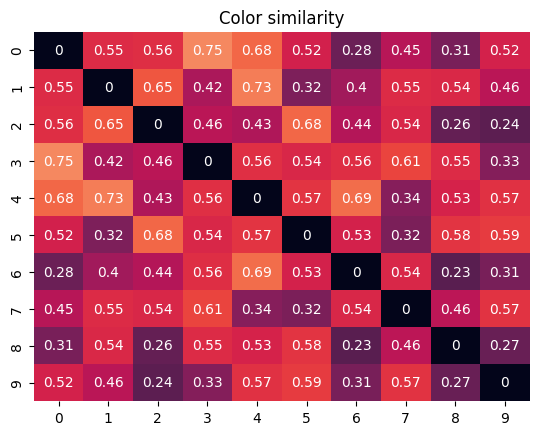

In [18]:
sns.heatmap(sims, annot=True, cbar=False, vmin=0, vmax=1)
plt.title("Color similarity")